Credit Risk

Problem Statement

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year.
Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'

Hints :

Dependent variable - No need to create any new variable, as the 'Default' variable is already provided in the dataset, which can be considered as the dependent variable. 

Test Train Split -   Split the data into Train and Test dataset in a ratio of 67:33 and use random_state =42. Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset.
Credit Risk Dataset
Data Dictionary

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Top 5 rows of the data

In [4]:
df = pd.read_excel("CompData-1 (1).xlsx")
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


Last 5 rows of the data

In [5]:
df.tail()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
2053,2743,Kothari Ferment.,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,...,0.320387,0.004430,0,0.000420,0.624567,0.026791,0.565158,1,0.171662,0
2054,21216,Firstobj.Tech.,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,...,0.312324,0.032284,0,0.000882,0.624008,0.024201,0.573670,1,0.053740,0
2055,142,Diamines & Chem.,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,...,0.313122,0.040998,0,0.009579,0.623718,0.026702,0.564697,1,0.054984,0
2056,18014,IL&FS Engg.,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,...,0.315632,0.020275,0,0.004958,0.623443,0.026943,0.565792,1,0.057553,0
2057,43229,Channel Nine,2.981110e-04,0.000000e+00,0.467203,0.000826,0.000000,0.330021,0.180236,0.022418,...,0.316734,0.031368,0,0.000186,0.623588,0.026871,0.565512,1,0.020266,0


Shape of the data

In [6]:
df.shape

(2058, 58)

Describe the data

In [7]:
df.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,1891.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2044.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,17572.113217,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.319986,0.176967,0.022761,0.848108,...,0.314629,0.039352,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,21892.886518,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.015300,0.030157,0.021701,0.004589,...,0.012780,0.047978,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,4.000000,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,3674.000000,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.314989,0.166604,0.022058,0.847974,...,0.312783,0.021775,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,6240.000000,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,24280.750000,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325918,0.185885,0.022152,0.848115,...,0.316546,0.043947,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,72493.000000,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


Columns names

In [8]:
df.columns

Index(['Co_Code', 'Co_Name', '_Operating_Expense_Rate',
       '_Research_and_development_expense_rate', '_Cash_flow_rate',
       '_Interest_bearing_debt_interest_rate', '_Tax_rate_A',
       '_Cash_Flow_Per_Share', '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_pers

Renaming the column names

In [9]:
df.columns = df.columns.str.replace('_', '')

In [10]:
df.columns

Index(['CoCode', 'CoName', 'OperatingExpenseRate',
       'Researchanddevelopmentexpenserate', 'Cashflowrate',
       'Interestbearingdebtinterestrate', 'TaxrateA', 'CashFlowPerShare',
       'PerShareNetprofitbeforetaxYuan', 'RealizedSalesGrossProfitGrowthRate',
       'OperatingProfitGrowthRate', 'ContinuousNetProfitGrowthRate',
       'TotalAssetGrowthRate', 'NetValueGrowthRate',
       'TotalAssetReturnGrowthRateRatio', 'CashReinvestmentperc',
       'CurrentRatio', 'QuickRatio', 'InterestExpenseRatio',
       'TotaldebttoTotalnetworth', 'LongtermfundsuitabilityratioA',
       'NetprofitbeforetaxtoPaidincapital', 'TotalAssetTurnover',
       'AccountsReceivableTurnover', 'AverageCollectionDays',
       'InventoryTurnoverRatetimes', 'FixedAssetsTurnoverFrequency',
       'NetWorthTurnoverRatetimes', 'Operatingprofitperperson',
       'Allocationrateperperson', 'QuickAssetstoTotalAssets',
       'CashtoTotalAssets', 'QuickAssetstoCurrentLiability',
       'CashtoCurrentLiability', 'O

Checking for duplicate values

In [11]:
df.duplicated().sum()

0

Datatypes details

In [12]:
df.dtypes

CoCode                                          int64
CoName                                         object
OperatingExpenseRate                          float64
Researchanddevelopmentexpenserate             float64
Cashflowrate                                  float64
Interestbearingdebtinterestrate               float64
TaxrateA                                      float64
CashFlowPerShare                              float64
PerShareNetprofitbeforetaxYuan                float64
RealizedSalesGrossProfitGrowthRate            float64
OperatingProfitGrowthRate                     float64
ContinuousNetProfitGrowthRate                 float64
TotalAssetGrowthRate                          float64
NetValueGrowthRate                            float64
TotalAssetReturnGrowthRateRatio               float64
CashReinvestmentperc                          float64
CurrentRatio                                  float64
QuickRatio                                    float64
InterestExpenseRatio        

Info of the data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CoCode                                      2058 non-null   int64  
 1   CoName                                      2058 non-null   object 
 2   OperatingExpenseRate                        2058 non-null   float64
 3   Researchanddevelopmentexpenserate           2058 non-null   float64
 4   Cashflowrate                                2058 non-null   float64
 5   Interestbearingdebtinterestrate             2058 non-null   float64
 6   TaxrateA                                    2058 non-null   float64
 7   CashFlowPerShare                            1891 non-null   float64
 8   PerShareNetprofitbeforetaxYuan              2058 non-null   float64
 9   RealizedSalesGrossProfitGrowthRate          2058 non-null   float64
 10  OperatingPro

Outlier Treatment

In [14]:
df_num= df.select_dtypes(include=['float64','int64'])

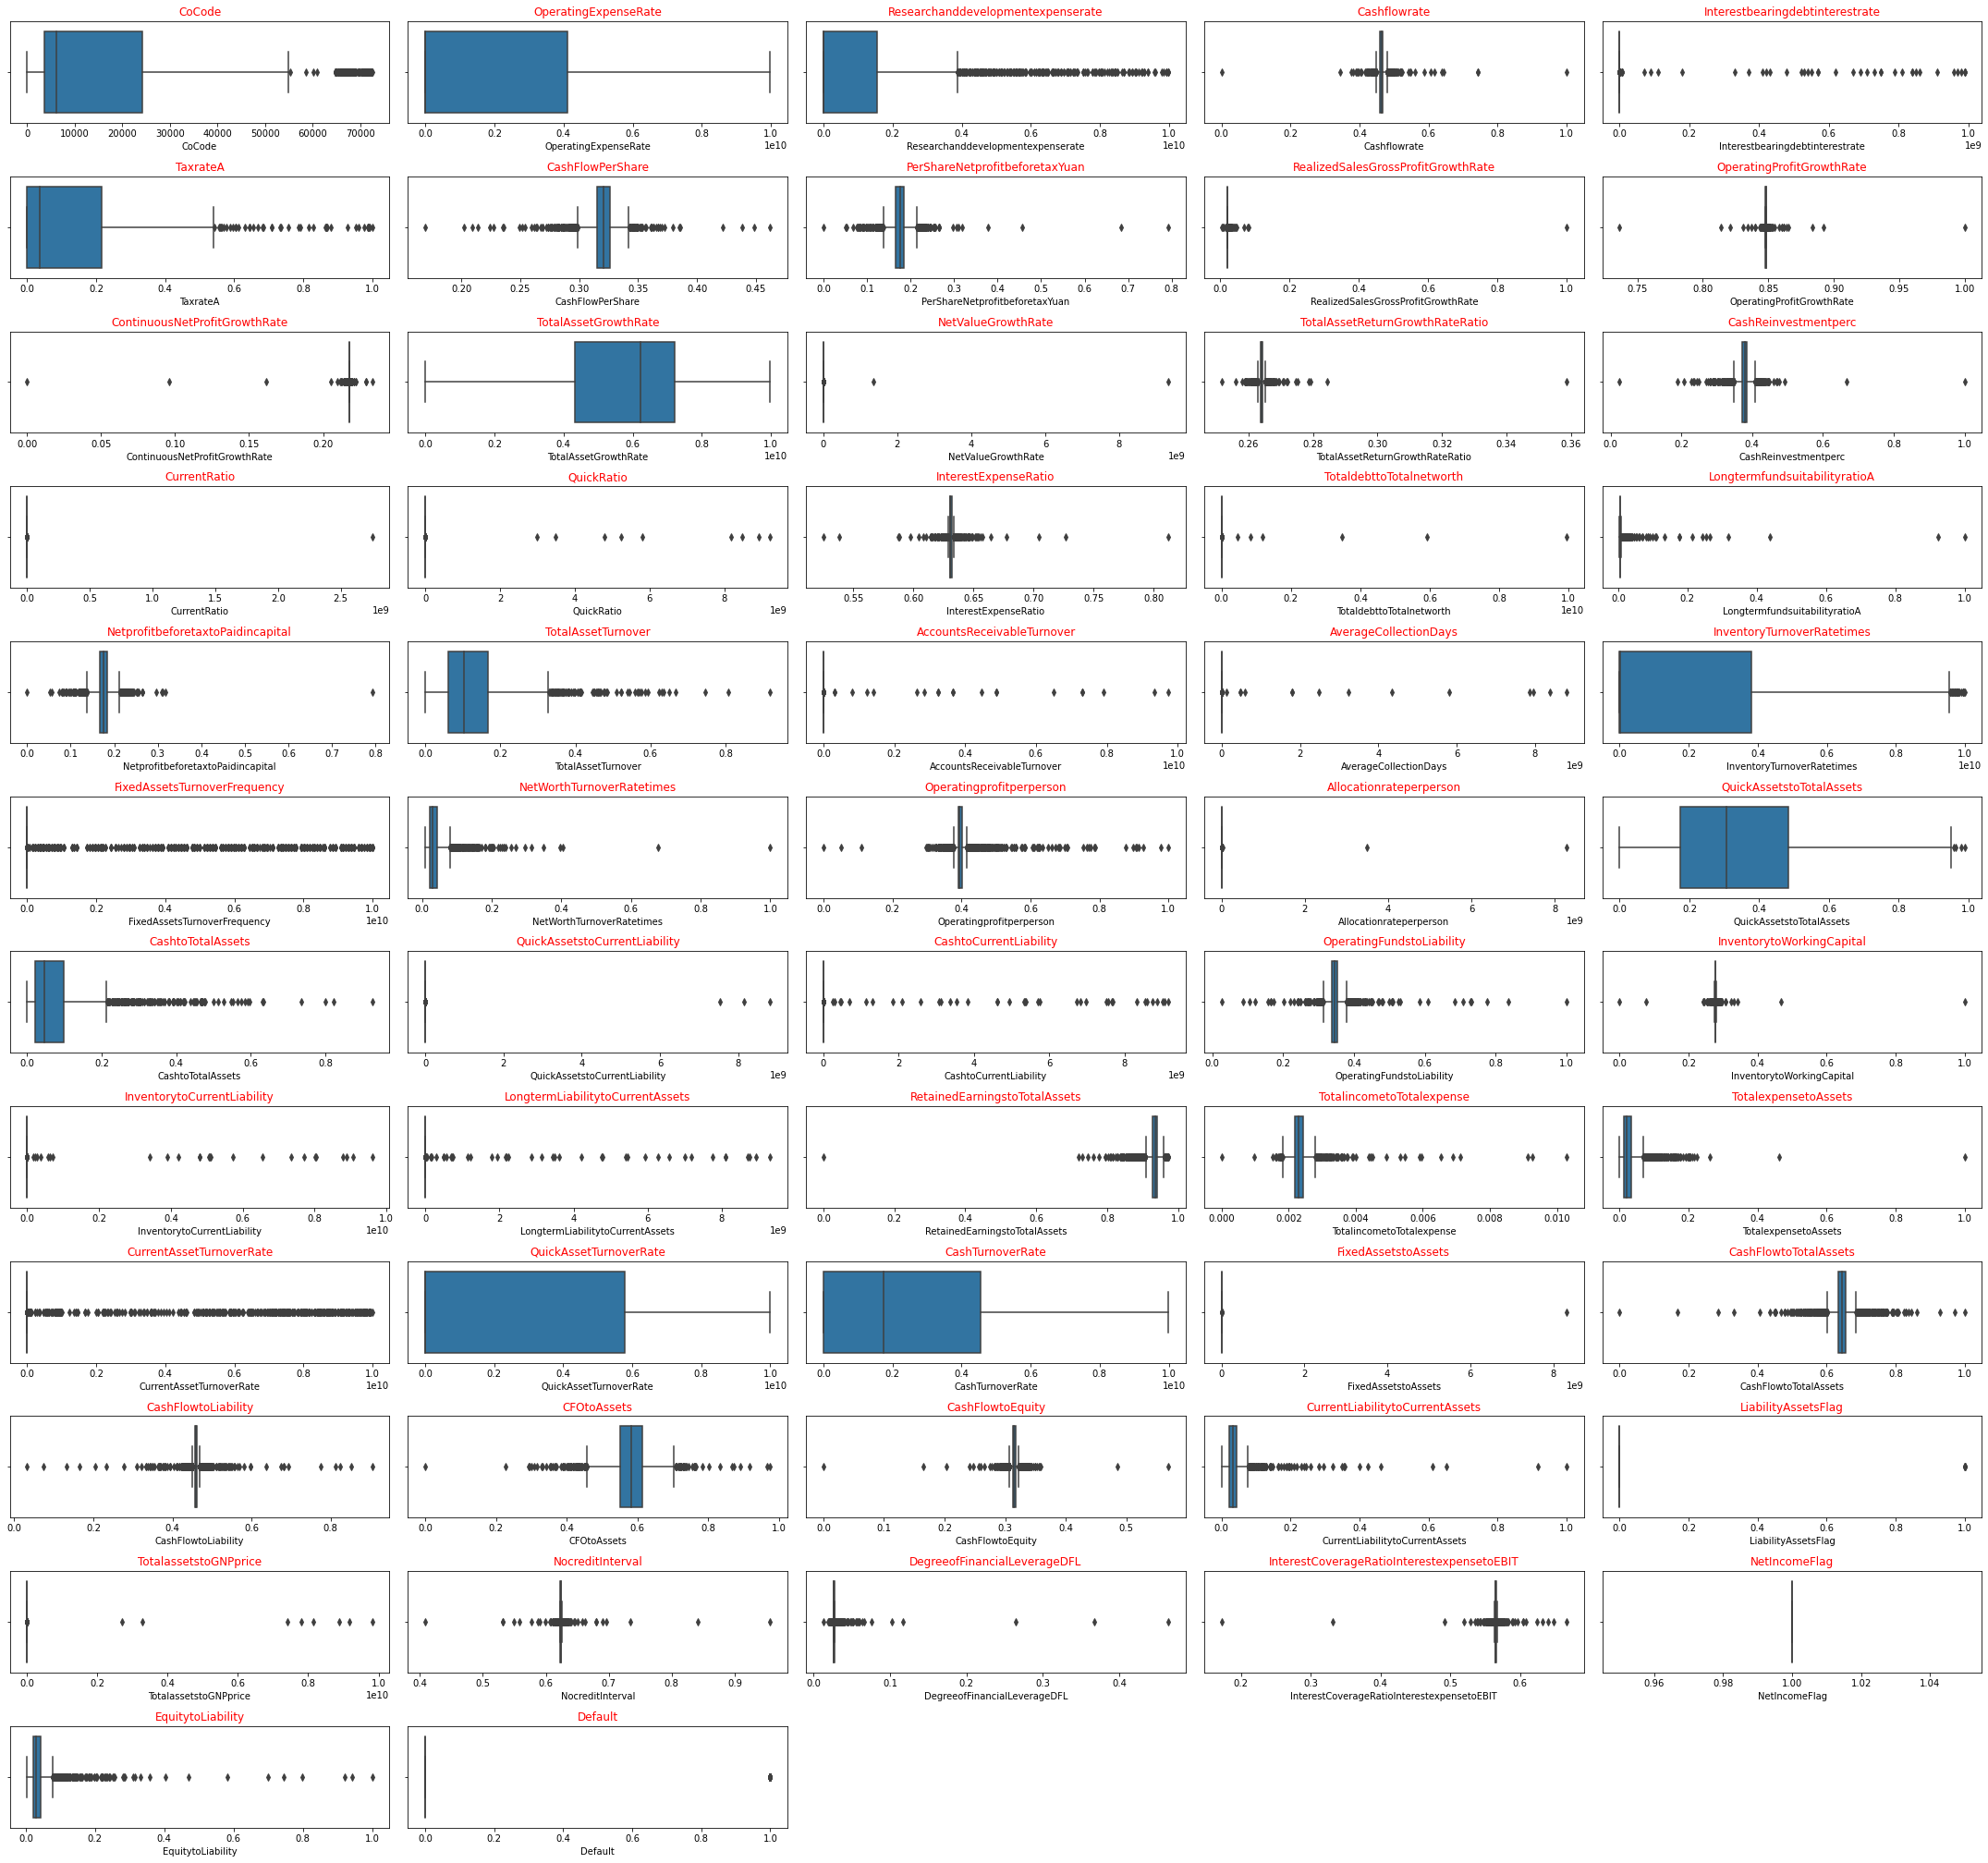

In [15]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [16]:
def treat_outlier(x):

    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [17]:
def print_outlier(x):
    
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
 
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [18]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

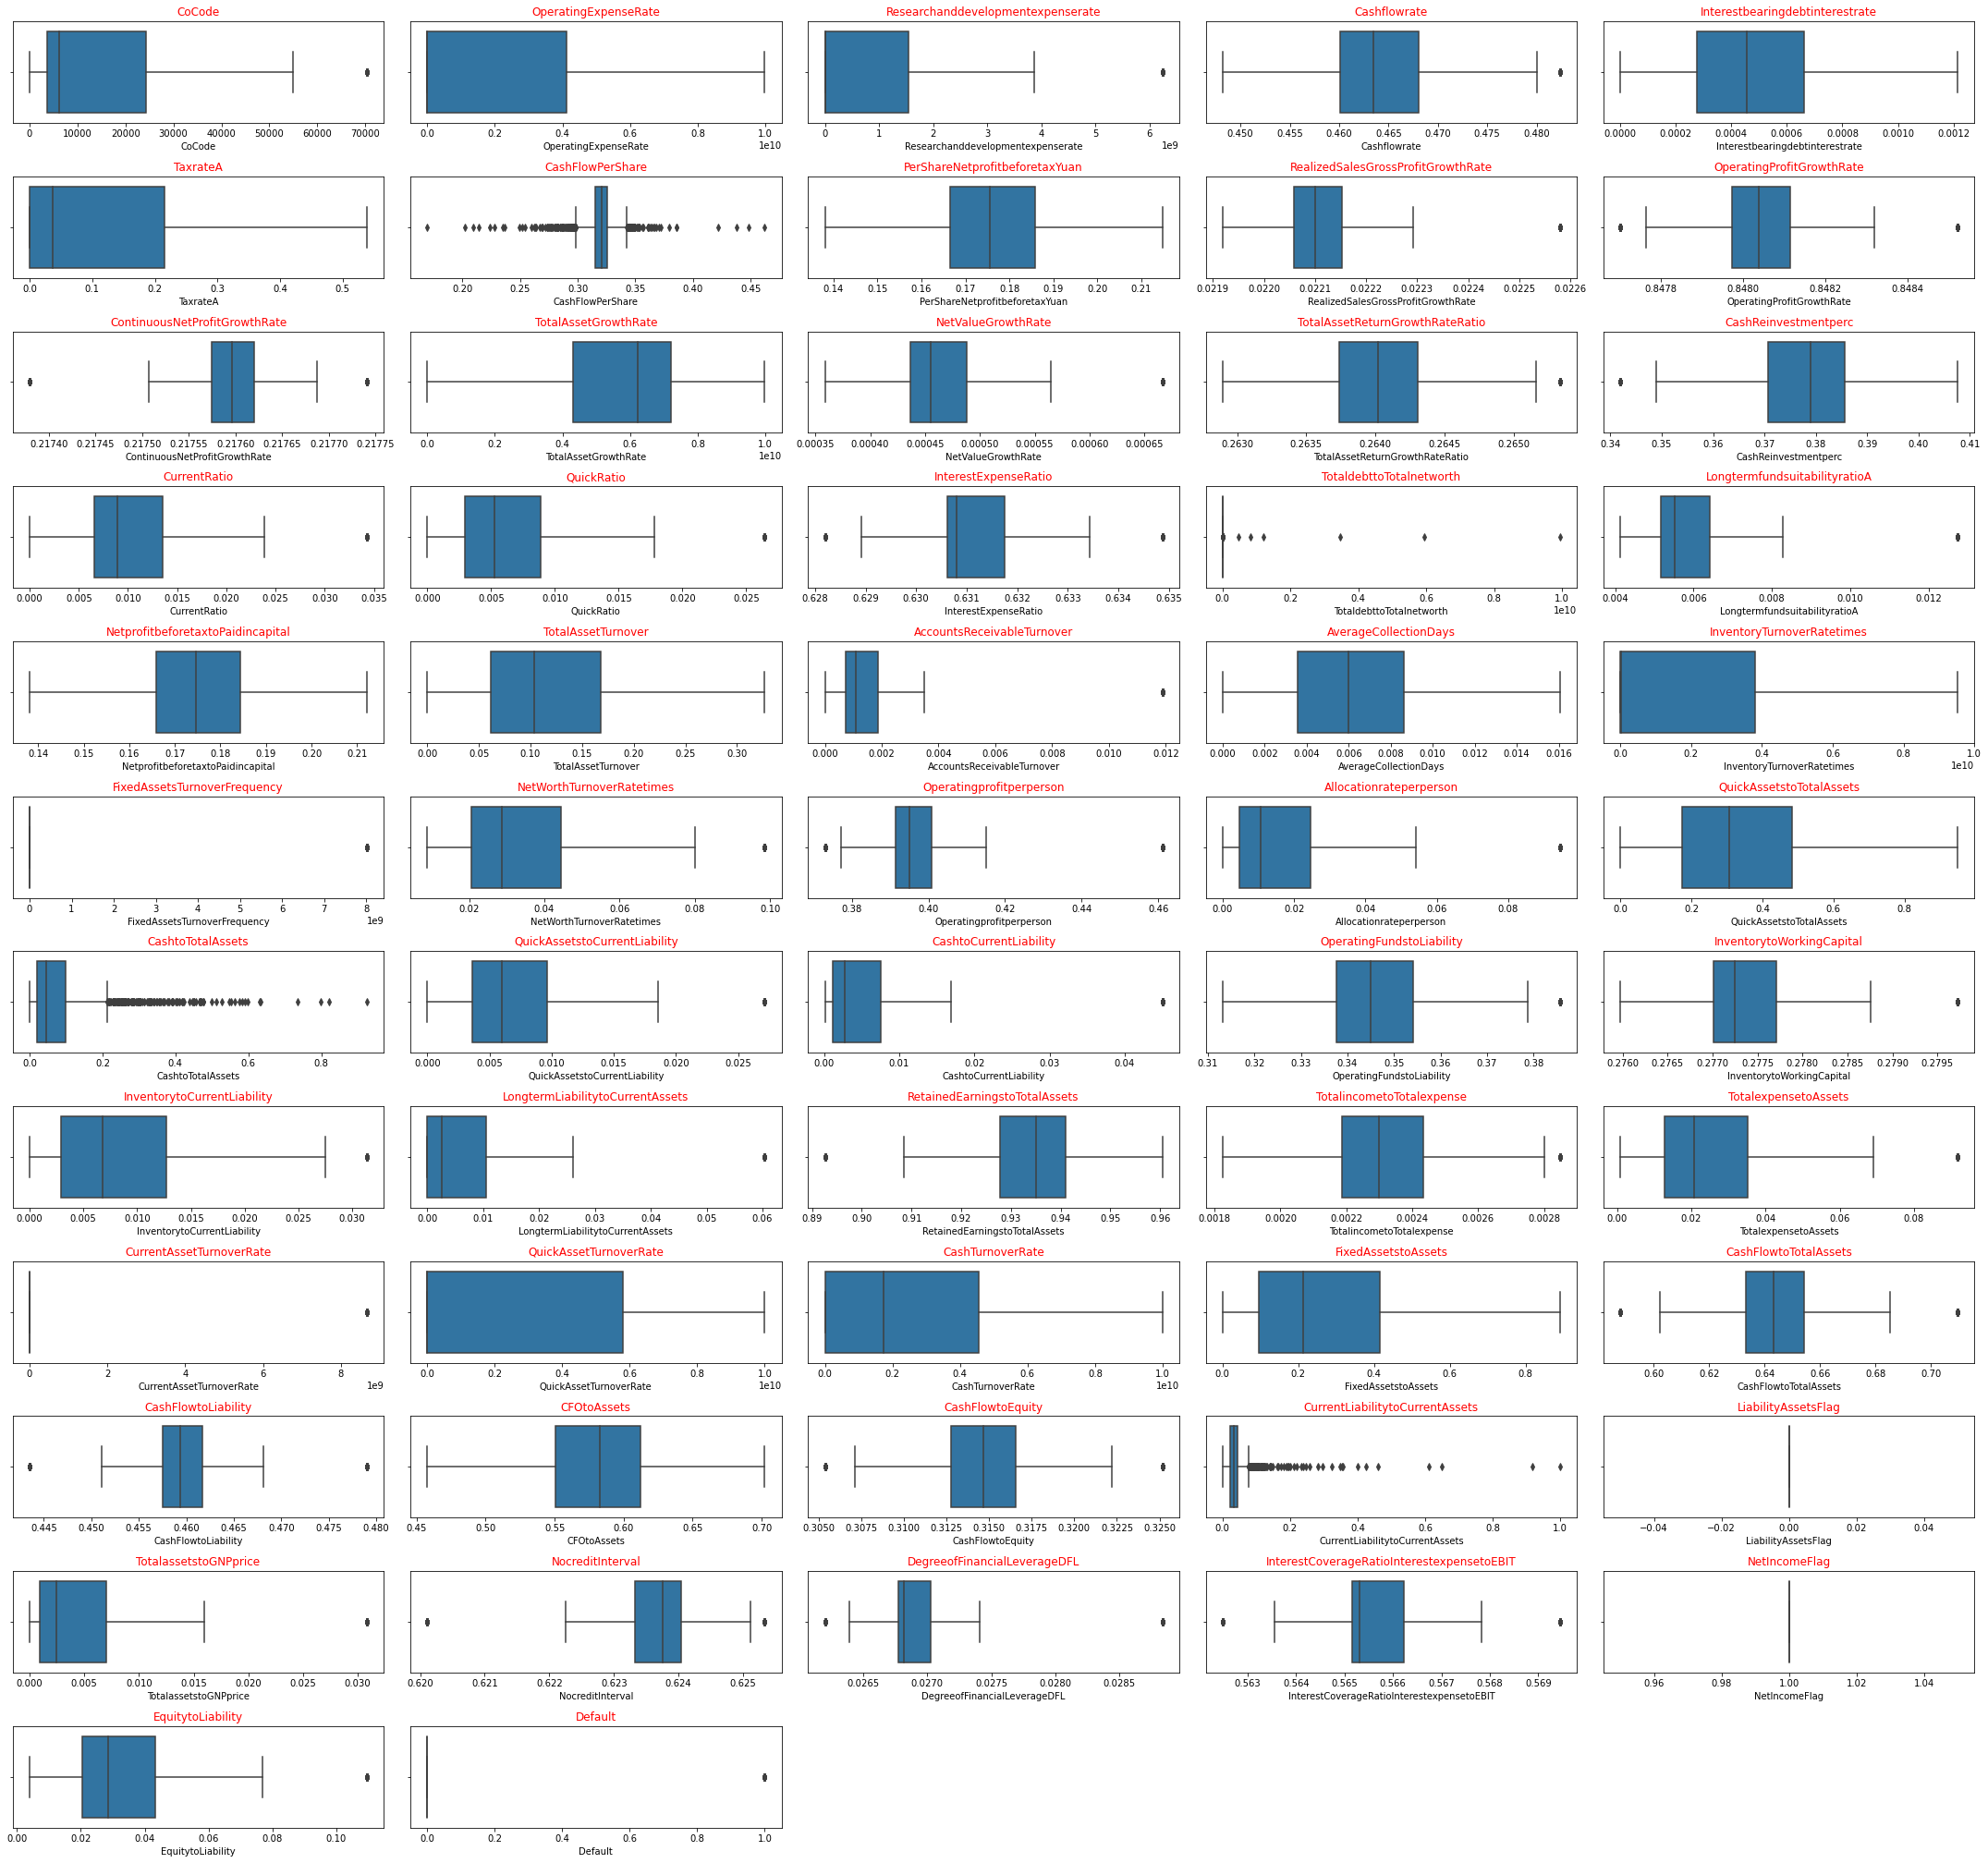

In [19]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

Missing Value Treatment

In [20]:
df.isnull().sum()

CoCode                                          0
CoName                                          0
OperatingExpenseRate                            0
Researchanddevelopmentexpenserate               0
Cashflowrate                                    0
Interestbearingdebtinterestrate                 0
TaxrateA                                        0
CashFlowPerShare                              167
PerShareNetprofitbeforetaxYuan                  0
RealizedSalesGrossProfitGrowthRate              0
OperatingProfitGrowthRate                       0
ContinuousNetProfitGrowthRate                   0
TotalAssetGrowthRate                            0
NetValueGrowthRate                              0
TotalAssetReturnGrowthRateRatio                 0
CashReinvestmentperc                            0
CurrentRatio                                    0
QuickRatio                                      0
InterestExpenseRatio                            0
TotaldebttoTotalnetworth                       21


In [21]:
df['CurrentLiabilitytoCurrentAssets'] = df['CurrentLiabilitytoCurrentAssets'].fillna(df['CurrentLiabilitytoCurrentAssets'].median())

In [22]:
df['CashtoTotalAssets'] = df['CashtoTotalAssets'].fillna(df['CashtoTotalAssets'].median())

In [23]:
df['CashFlowPerShare'] = df['CashFlowPerShare'].fillna(df['CashFlowPerShare'].median())

In [24]:
df['TotaldebttoTotalnetworth'] = df['TotaldebttoTotalnetworth'].fillna(df['TotaldebttoTotalnetworth'].median())

In [25]:
df.isnull().sum()

CoCode                                        0
CoName                                        0
OperatingExpenseRate                          0
Researchanddevelopmentexpenserate             0
Cashflowrate                                  0
Interestbearingdebtinterestrate               0
TaxrateA                                      0
CashFlowPerShare                              0
PerShareNetprofitbeforetaxYuan                0
RealizedSalesGrossProfitGrowthRate            0
OperatingProfitGrowthRate                     0
ContinuousNetProfitGrowthRate                 0
TotalAssetGrowthRate                          0
NetValueGrowthRate                            0
TotalAssetReturnGrowthRateRatio               0
CashReinvestmentperc                          0
CurrentRatio                                  0
QuickRatio                                    0
InterestExpenseRatio                          0
TotaldebttoTotalnetworth                      0
LongtermfundsuitabilityratioA           

Droping the columns

In [26]:
df = df.drop(['CoCode', 'CoName'], axis = 1)
df.head()

,OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interestbearingdebtinterestrate,TaxrateA,CashFlowPerShare,PerShareNetprofitbeforetaxYuan,RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,ContinuousNetProfitGrowthRate,...,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,LiabilityAssetsFlag,TotalassetstoGNPprice,NocreditInterval,DegreeofFinancialLeverageDFL,InterestCoverageRatioInterestexpensetoEBIT,NetIncomeFlag,EquitytoLiability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


Univariate Analysis

array([[<AxesSubplot:title={'center':'OperatingExpenseRate'}>,
        <AxesSubplot:title={'center':'Researchanddevelopmentexpenserate'}>,
        <AxesSubplot:title={'center':'Cashflowrate'}>,
        <AxesSubplot:title={'center':'Interestbearingdebtinterestrate'}>,
        <AxesSubplot:title={'center':'TaxrateA'}>,
        <AxesSubplot:title={'center':'CashFlowPerShare'}>,
        <AxesSubplot:title={'center':'PerShareNetprofitbeforetaxYuan'}>],
       [<AxesSubplot:title={'center':'RealizedSalesGrossProfitGrowthRate'}>,
        <AxesSubplot:title={'center':'OperatingProfitGrowthRate'}>,
        <AxesSubplot:title={'center':'ContinuousNetProfitGrowthRate'}>,
        <AxesSubplot:title={'center':'TotalAssetGrowthRate'}>,
        <AxesSubplot:title={'center':'NetValueGrowthRate'}>,
        <AxesSubplot:title={'center':'TotalAssetReturnGrowthRateRatio'}>,
        <AxesSubplot:title={'center':'CashReinvestmentperc'}>],
       [<AxesSubplot:title={'center':'CurrentRatio'}>,
        <AxesS

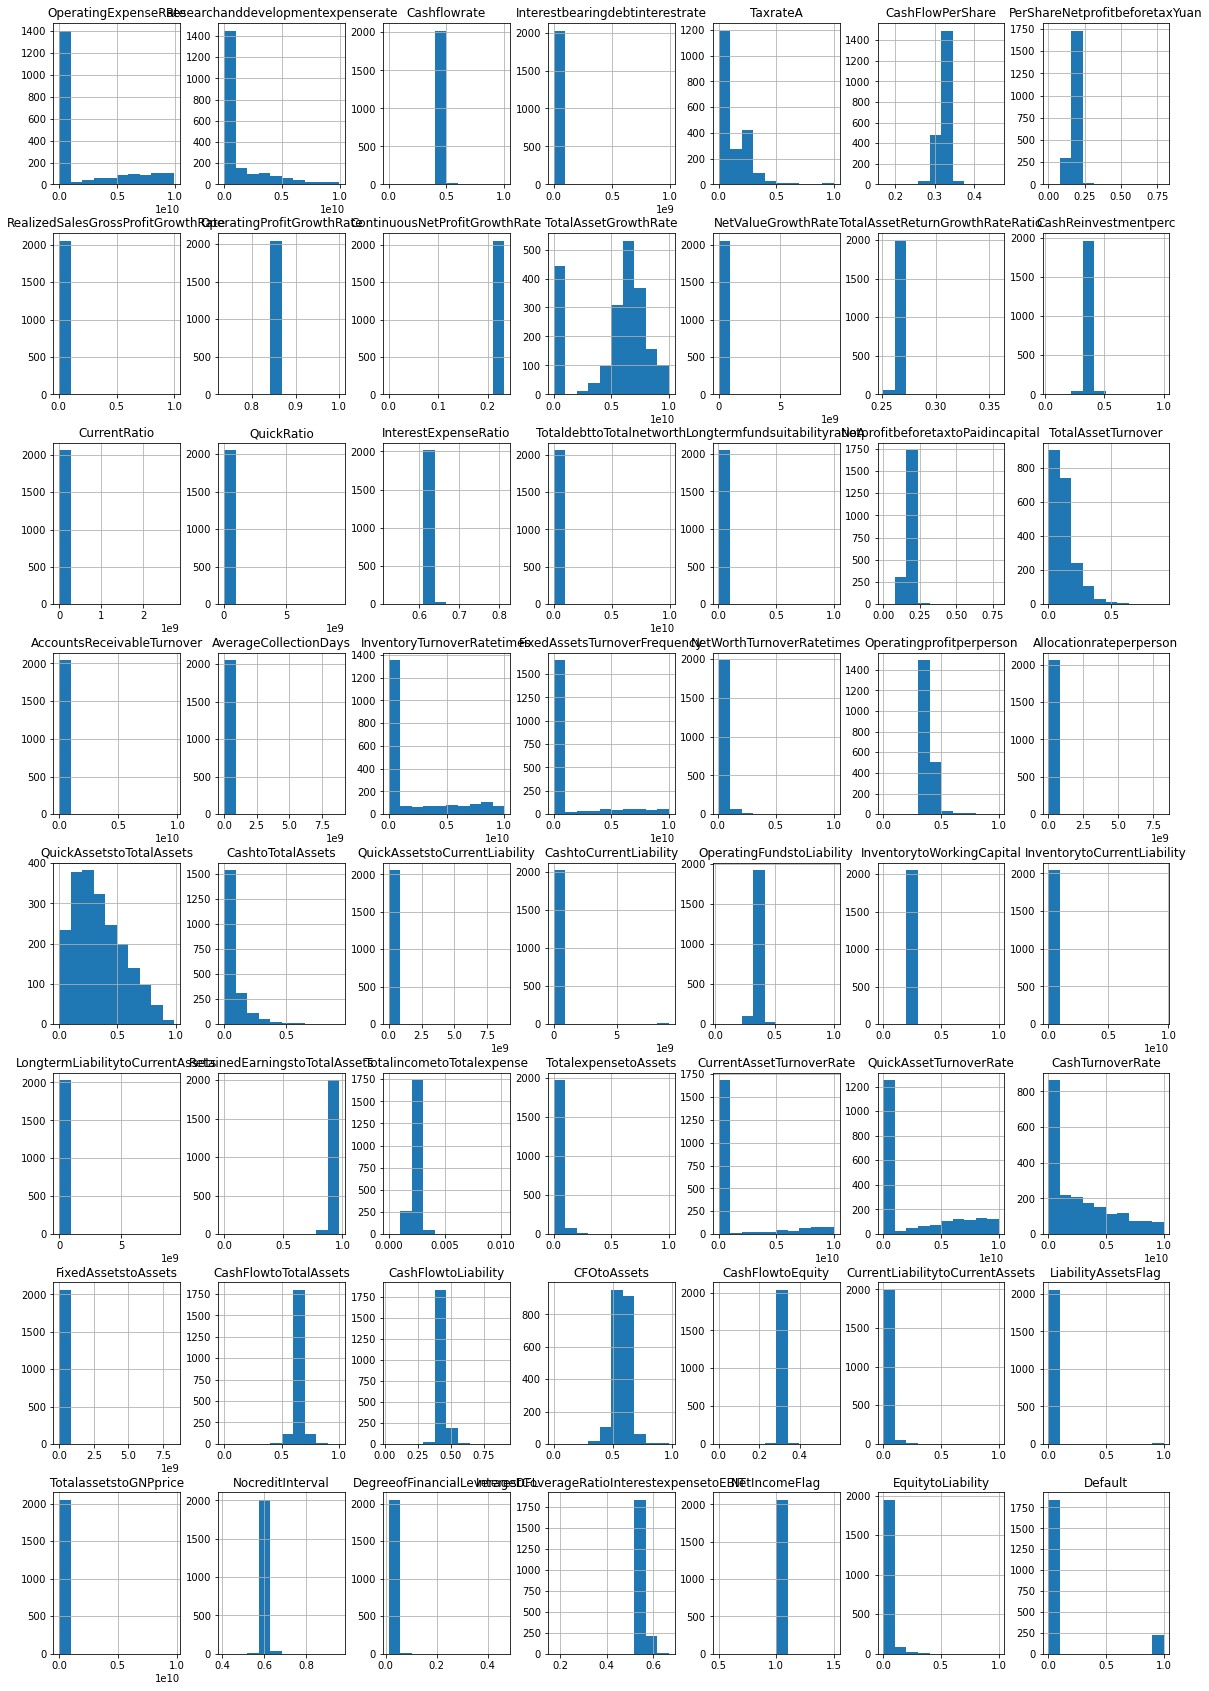

In [27]:
df.hist(figsize=(20,30))

Correlation

In [28]:
corr = df.corr()
corr

,OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interestbearingdebtinterestrate,TaxrateA,CashFlowPerShare,PerShareNetprofitbeforetaxYuan,RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,ContinuousNetProfitGrowthRate,...,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,LiabilityAssetsFlag,TotalassetstoGNPprice,NocreditInterval,DegreeofFinancialLeverageDFL,InterestCoverageRatioInterestexpensetoEBIT,NetIncomeFlag,EquitytoLiability,Default
OperatingExpenseRate,1.000000,-0.056053,-0.005952,-0.011800,0.045098,-0.029786,0.071273,-0.015138,0.040289,0.000687,...,0.024649,-0.035987,-0.003893,-0.036773,0.000014,0.003302,-0.032517,NaN,-0.105709,-0.017544
Researchanddevelopmentexpenserate,-0.056053,1.000000,0.012006,0.004101,-0.042044,0.037201,-0.034641,-0.006365,0.016900,0.005108,...,0.028588,-0.079428,0.004292,0.009084,-0.020097,0.009770,-0.056302,NaN,-0.002040,0.064059
Cashflowrate,-0.005952,0.012006,1.000000,0.015416,0.057575,0.273687,0.102304,-0.012234,-0.005802,0.005318,...,0.080332,-0.045854,-0.011922,-0.022361,0.041804,-0.004239,-0.000932,NaN,0.329836,-0.069656
Interestbearingdebtinterestrate,-0.011800,0.004101,0.015416,1.000000,0.024528,0.015775,0.030109,-0.003742,-0.002188,0.005941,...,-0.011035,0.064814,0.083278,-0.007255,-0.020884,-0.009217,-0.002019,NaN,0.051846,-0.031984
TaxrateA,0.045098,-0.042044,0.057575,0.024528,1.000000,0.104955,0.256484,0.010968,0.041409,0.038121,...,0.055528,-0.052896,-0.043996,-0.037508,0.100098,-0.005767,0.051086,NaN,-0.025631,-0.188608
CashFlowPerShare,-0.029786,0.037201,0.273687,0.015775,0.104955,1.000000,0.307426,-0.222966,-0.057979,-0.016472,...,0.107815,0.015231,-0.006815,0.005216,0.025101,0.002421,0.003407,NaN,0.050646,-0.078630
PerShareNetprofitbeforetaxYuan,0.071273,-0.034641,0.102304,0.030109,0.256484,0.307426,1.000000,0.001068,0.101983,0.050676,...,0.109888,-0.106350,-0.199235,-0.036341,0.013218,-0.012304,0.021377,NaN,0.020859,-0.335090
RealizedSalesGrossProfitGrowthRate,-0.015138,-0.006365,-0.012234,-0.003742,0.010968,-0.222966,0.001068,1.000000,0.005356,0.002474,...,-0.012212,-0.005494,-0.002822,0.000770,-0.000260,-0.001949,-0.000894,NaN,-0.005243,-0.006118
OperatingProfitGrowthRate,0.040289,0.016900,-0.005802,-0.002188,0.041409,-0.057979,0.101983,0.005356,1.000000,0.054691,...,-0.130006,-0.077678,-0.212507,-0.002386,-0.002040,0.002825,0.005596,NaN,-0.008420,-0.077024
ContinuousNetProfitGrowthRate,0.000687,0.005108,0.005318,0.005941,0.038121,-0.016472,0.050676,0.002474,0.054691,1.000000,...,-0.004137,-0.006130,-0.004506,0.001736,0.000414,0.003695,0.004291,NaN,0.012356,-0.016488


Heatmap

<AxesSubplot:>

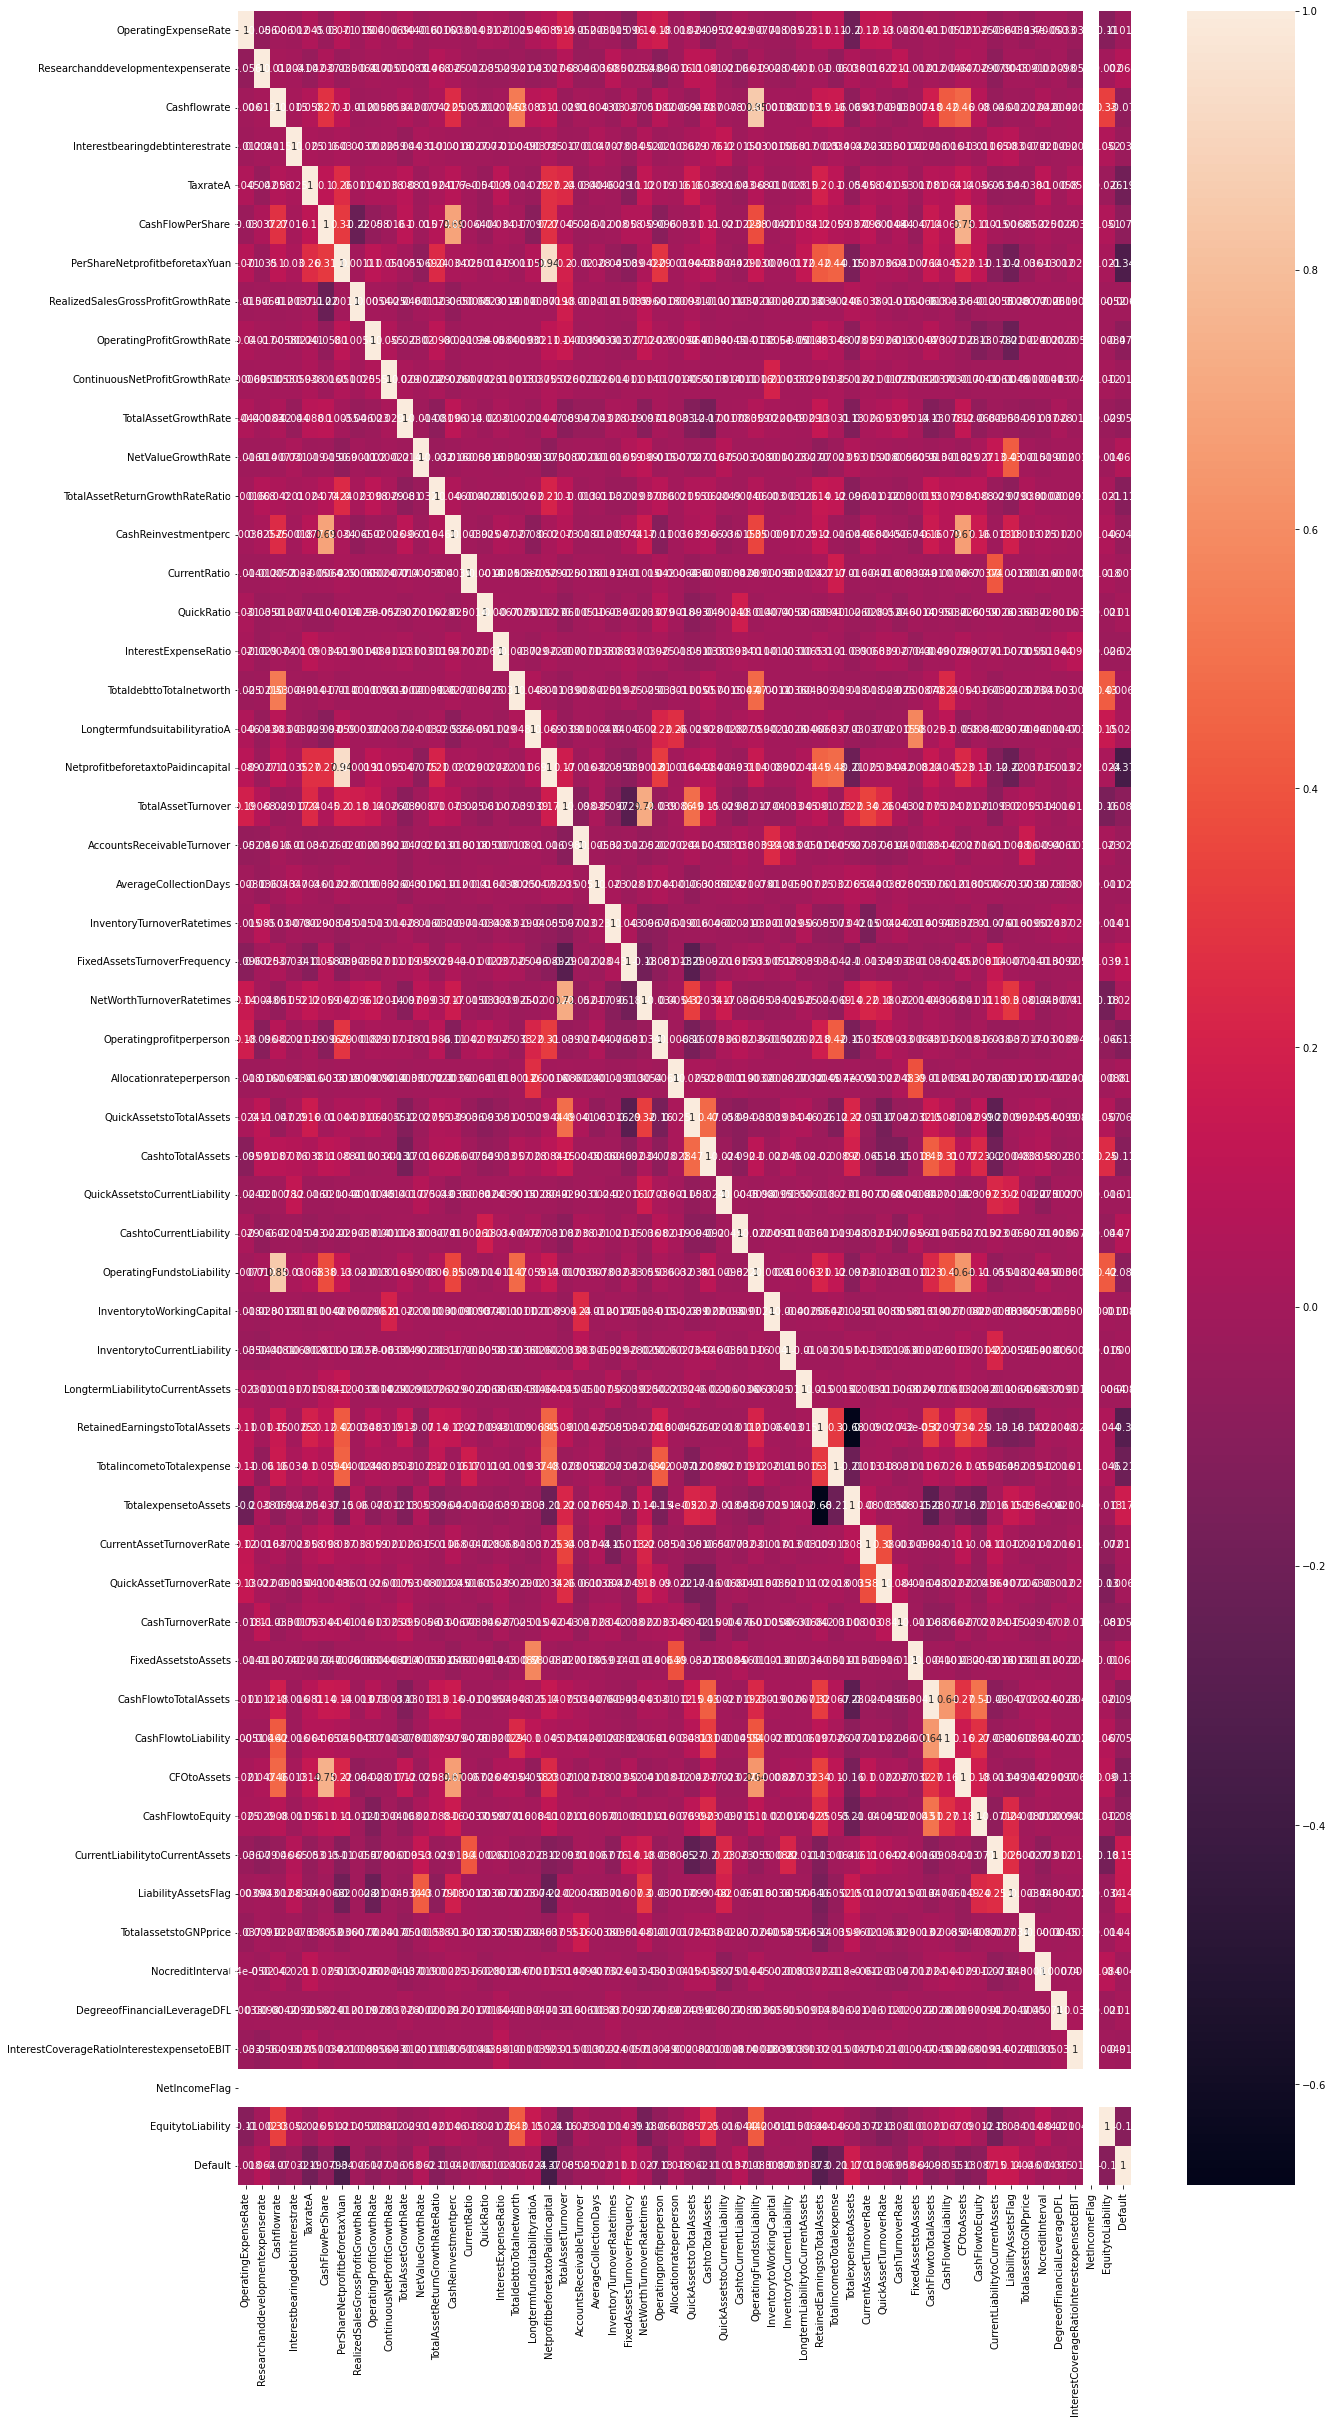

In [29]:
plt.figure(figsize=(20,40))
sns.heatmap(corr, annot=True)

1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

Random Forest Classifier

In [30]:
X = df.drop('Default', axis = 1)
y = df['Default']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.33, random_state = 42)

In [33]:
X_train.shape

(1378, 55)

In [34]:
y_train.shape

(1378,)

In [35]:
X_test.shape

(680, 55)

In [36]:
y_test.shape

(680,)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [15,20],
    'min_samples_leaf': [10,20],
    'min_samples_split': [ 50,100],
    'n_estimators': [301,401,701]
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [50, 100],
                         'n_estimators': [301, 401, 701]})

In [39]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 401}

In [40]:
best_grid = grid_search.best_estimator_

In [41]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [42]:
ytrain_predict_prob_rm= best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_rm).head()

,0,1
0,0.980241,0.019759
1,0.962350,0.037650
2,0.998301,0.001699
3,0.996447,0.003553
4,0.983423,0.016577


In [43]:
ytest_predict_prob_rm=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_rm).head()

,0,1
0,0.987356,0.012644
1,0.999367,0.000633
2,0.979564,0.020436
3,0.992515,0.007485
4,0.907412,0.092588


In [44]:
print(pd.DataFrame(best_grid.feature_importances_, columns=["IMP"],index = X_train.columns).sort_values('IMP',ascending =False))

                                                 IMP
NetValueGrowthRate                          0.117016
RetainedEarningstoTotalAssets               0.087283
NetprofitbeforetaxtoPaidincapital           0.083313
PerShareNetprofitbeforetaxYuan              0.070727
TotalincometoTotalexpense                   0.068177
TotaldebttoTotalnetworth                    0.056274
EquitytoLiability                           0.054991
InterestExpenseRatio                        0.046448
InterestCoverageRatioInterestexpensetoEBIT  0.043838
DegreeofFinancialLeverageDFL                0.041531
InventorytoWorkingCapital                   0.034222
QuickRatio                                  0.024615
CurrentRatio                                0.024057
CurrentLiabilitytoCurrentAssets             0.019727
QuickAssetstoCurrentLiability               0.018184
Operatingprofitperperson                    0.016807
CashtoCurrentLiability                      0.011811
TotalAssetReturnGrowthRateRatio             0.

1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [45]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1225
           1       0.83      0.47      0.60       153

    accuracy                           0.93      1378
   macro avg       0.88      0.73      0.78      1378
weighted avg       0.93      0.93      0.92      1378



In [46]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       613
           1       0.64      0.37      0.47        67

    accuracy                           0.92       680
   macro avg       0.79      0.68      0.71       680
weighted avg       0.91      0.92      0.91       680



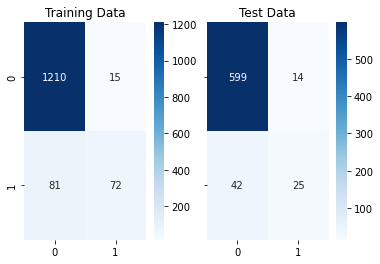

In [47]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train_rf)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test_rf)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC for the Training Data: 0.962


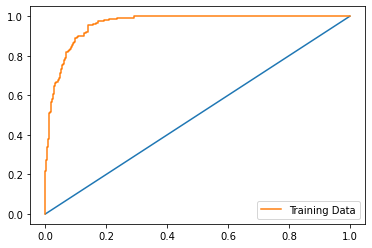

In [48]:
train_auc_rf = metrics.roc_auc_score(y_train,ytrain_predict_prob_rm[:,1])
print('AUC for the Training Data: %.3f' % train_auc_rf)
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_rm[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.927


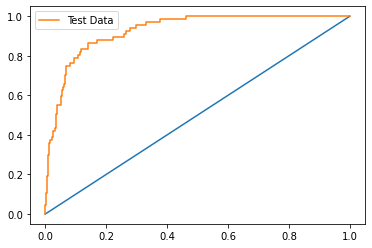

In [49]:
test_auc_rf = metrics.roc_auc_score(y_test,ytest_predict_prob_rm[:,1])
print('AUC for the Test Data: %.3f' %test_auc_rf )
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_rm[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label='Test Data')
plt.legend(loc='best')
plt.show()

1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
LDA = LinearDiscriminantAnalysis()

In [52]:
lda_model = LDA.fit(X_train, y_train)

In [53]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [54]:
ytrain_predict_prob_lda= lda_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_lda).head()

,0,1
0,0.921580,0.078420
1,0.980494,0.019506
2,0.992500,0.007500
3,0.995654,0.004346
4,0.987760,0.012240


In [55]:
ytest_predict_prob_lda= lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

,0,1
0,0.985759,0.014241
1,0.995441,0.004559
2,0.982462,0.017538
3,0.984908,0.015092
4,0.843093,0.156907


1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [56]:
print(classification_report(y_train, pred_train_lda));

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1225
           1       0.60      0.33      0.42       153

    accuracy                           0.90      1378
   macro avg       0.76      0.65      0.68      1378
weighted avg       0.89      0.90      0.89      1378



In [57]:
print(classification_report(y_test, pred_test_lda));

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       613
           1       0.41      0.39      0.40        67

    accuracy                           0.89       680
   macro avg       0.67      0.66      0.67       680
weighted avg       0.88      0.89      0.88       680



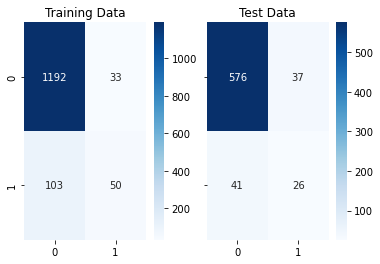

In [58]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train_lda)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test_lda)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC for the Training Data: 0.899


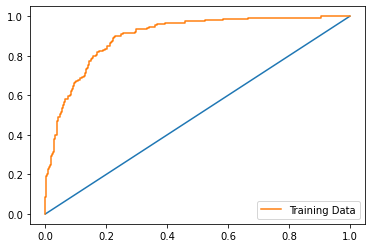

In [59]:
train_auc_lda = metrics.roc_auc_score(y_train,ytrain_predict_prob_lda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.839


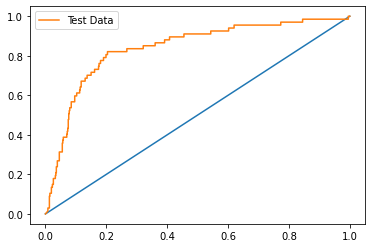

In [60]:
test_auc_lda = metrics.roc_auc_score(y_test,ytest_predict_prob_lda[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lda )
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label='Test Data')
plt.legend(loc='best')
plt.show()

In [61]:
LogR = LogisticRegression()

In [62]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [63]:
selector = selector.fit(X_train, y_train)

In [64]:
selector.n_features_

15

In [65]:
selector.ranking_

array([ 1,  3, 16,  1, 23, 21, 25, 33,  8, 28,  1, 41, 24, 18, 31,  1, 10,
        5, 37, 26, 29,  1,  1,  1,  1, 34, 17,  1, 14, 27, 36,  1, 19, 22,
        1,  1,  7, 40, 39,  2,  4,  1,  1,  9, 15, 12, 20, 38, 32,  1, 11,
       35, 13,  6, 30])

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [68]:
print(confusion_matrix(y_train, pred_train))

[[1190   35]
 [ 147    6]]


In [69]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1225
           1       0.15      0.04      0.06       153

    accuracy                           0.87      1378
   macro avg       0.52      0.51      0.50      1378
weighted avg       0.81      0.87      0.83      1378



In [70]:
print(confusion_matrix(y_test, pred_test))

[[587  26]
 [ 64   3]]


In [71]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       613
           1       0.10      0.04      0.06        67

    accuracy                           0.87       680
   macro avg       0.50      0.50      0.50       680
weighted avg       0.82      0.87      0.84       680



In [72]:
ytrain_predict_prob_lgr= selector.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_lgr).head()

,0,1
0,0.878626,0.121374
1,0.993381,0.006619
2,0.863217,0.136783
3,0.909813,0.090187
4,0.932414,0.067586


In [73]:
ytest_predict_prob_lgr= selector.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lgr).head()

,0,1
0,0.500000,0.500000
1,0.962616,0.037384
2,0.887502,0.112498
3,0.811635,0.188365
4,0.870611,0.129389


AUC for the Training Data: 0.624


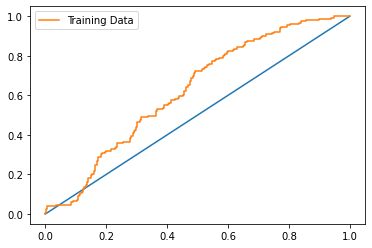

In [74]:
train_auc_lgr = metrics.roc_auc_score(y_train,ytrain_predict_prob_lgr[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lgr)
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_lgr[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.609


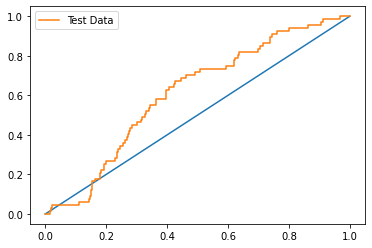

In [75]:
test_auc_lgr = metrics.roc_auc_score(y_test,ytest_predict_prob_lgr[:,1])
print('AUC for the Test Data: %.3f' % test_auc_lgr)
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_lgr[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label = 'Test Data')
plt.legend(loc='best')
plt.show()